[Sebastian Raschka](http://www.sebastianraschka.com)

[back](https://github.com/rasbt/matplotlib-gallery) to the `matplotlib-gallery` at [https://github.com/rasbt/matplotlib-gallery](https://github.com/rasbt/matplotlib-gallery)

In [1]:
%load_ext watermark

In [2]:
%watermark -u -v -d -p matplotlib,numpy,scipy

Last updated: 09/10/2014 

CPython 3.4.1
IPython 2.2.0

matplotlib 1.4.0
numpy 1.9.0
scipy 0.14.0


<font size="1.5em">[More info](http://nbviewer.ipython.org/github/rasbt/watermark) about the `%watermark` extension</font>

In [3]:
%matplotlib inline

<br>

# Preparing Plots for Publication via matplotlib

Sometimes, we are not quite happy with matplotlib's default designs. Here are a few suggestions to adjust matplotlib's default plots so that they are more pleasing in the viewer's eye.  

In this section, I will re-use certain settings for different types of plots, but if you'd like to change the settings globally (for the active session or even in the matplotlib settings) please see the section [Applying customization and settings globally](http://nbviewer.ipython.org/github/rasbt/matplotlib-gallery/blob/master/ipynb/formatting.ipynb#Applying-customization-and-settings-globally).

# Sections

- [Errorbar Plots](#Errorbar-Plots)
- [Boxplots](#Boxplots)
- [Barplots](#Barplots)
- [Histograms](#Histograms)
- [Pie charts](#Pie-charts)
- [Violin plots](#Violin-plots)

<br>
<br>

# Errorbar Plots

[[back to top](#Sections)]

<br>
<br>

### Default Errorbar Plot

In [4]:
import matplotlib.pyplot as plt

def errorbar_default():

    # Data
    data = [1, 1.5, 1.2]
    std_devs = [0.15, 0.25, 0.12]

    # X axis positions
    x_pos = range(len(data))

    for d, std, x in zip(data, std_devs, x_pos):
        plt.errorbar(x=x, y=d, yerr=std, fmt='o')

    # setting axis limits   
    plt.xlim([min(x_pos)-1, max(x_pos)+1])    
    plt.ylim([min(data)*0.7, max(data)*1.3])  

    # setting labels and titles   
    plt.ylabel('x label')
    plt.title('Matplotlib default')

    plt.legend(['X1', 'X2', 'X3'], loc='upper right')

    plt.show()

### Modified Errorbar Plot

In [7]:
import numpy as np
def errorbar_modified():

    # Data
    data = [1, 1.5, 1.2]
    std_devs = [0.15, 0.25, 0.12]

    # X axis positions
    x_pos = range(len(data))

    colors = ['lightblue', 'pink', 'lightgreen']

    fig = plt.gca()
    ax = plt.subplot(111)  

    # draw plots
    for d, std, col, x in zip(data, std_devs, colors, x_pos):
        plt.errorbar(x=x, y=d, yerr=std, fmt='o', color=col, ecolor='black')
    
    # setting axis limits    
    plt.xlim([min(x_pos)-1, max(x_pos)+1])    
    plt.ylim([min(data)*0.7, max(data)*1.3])  
    
    # setting labels and titles    
    plt.ylabel('x label')
    plt.text(1, 2, 'Modified',
         horizontalalignment='center',
         fontsize=14)

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="off", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True)

    plt.legend(['X1', 'X2', 'X3'], loc='upper right', fancybox=True, numpoints=1)
    
    plt.tight_layout()
    plt.show()

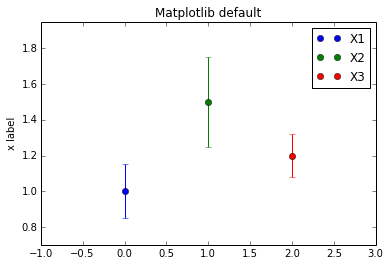

In [8]:
errorbar_default()

<hr>

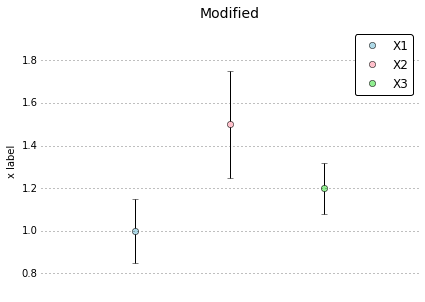

In [9]:
errorbar_modified()

<br>
<br>

# Boxplots

[[back to top](#Sections)]

In [11]:
data = [np.random.normal(0, std, 50) for std in range(1, 4)]

### Default Boxplot

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def boxplot_default():

    fig = plt.figure(figsize=(8,6))

    plt.boxplot(data, 
            notch=False, # box instead of notch shape 
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])
    plt.title('Matplotlib default')
    plt.show()

### Modified Boxplot

In [23]:
def boxplot_modified():
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    bplot = plt.boxplot(data, 
            notch=True,          # notch shape 
            vert=True,           # vertical box aligmnent
            sym='ko',            # red circle for outliers
            patch_artist=True,   # fill with color
            )   

    # choosing custom colors to fill the boxes
    colors = ['pink', 'lightblue', 'lightgreen']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # modifying the whiskers: straight lines, black, wider
    for whisker in bplot['whiskers']:
        whisker.set(color='black', linewidth=1.2, linestyle='-')    
    
    # making the caps a little bit wider 
    for cap in bplot['caps']:
        cap.set(linewidth=1.2)
    
    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])

    # raised title
    plt.text(2, 9, 'Modified',
         horizontalalignment='center',
         fontsize=18)

    plt.tight_layout()
    plt.show()

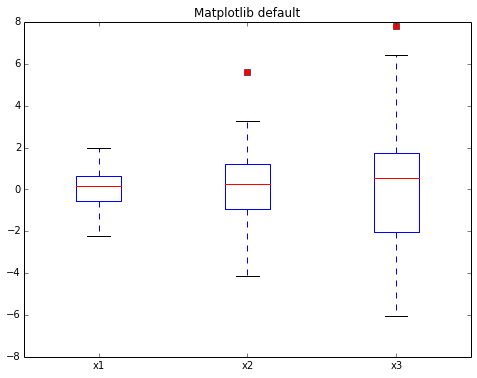

In [24]:
boxplot_default()

<hr>

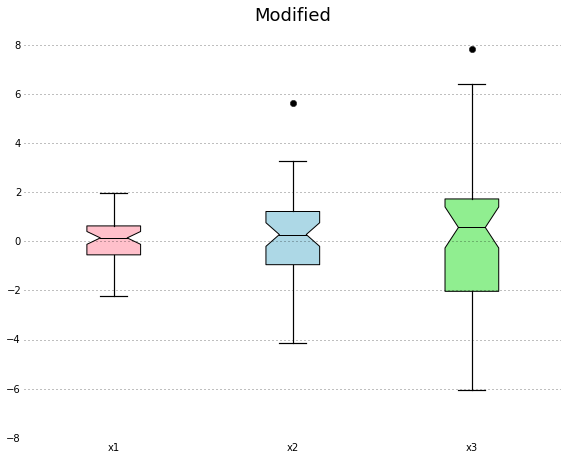

In [25]:
boxplot_modified()

<br>
<br>

# Barplots

<br>
<br>

[[back to top](#Sections)]

### Default Barplot

In [26]:
import matplotlib.pyplot as plt

def barplot_default():   

    # input data
    mean_values = [1, 2, 3]
    variance = [0.2, 0.4, 0.5]
    bar_labels = ['bar 1', 'bar 2', 'bar 3']

    fig = plt.figure(figsize=(6,4))

    # plot bars
    x_pos = list(range(len(bar_labels)))
    plt.bar(x_pos, mean_values, yerr=variance, align='center')


    # set axes labels and title
    plt.ylabel('variable y')
    plt.xticks(x_pos, bar_labels)
    plt.title('Matplotlib default')

    plt.show()


### Modified Barplot

In [30]:
import matplotlib.pyplot as plt

def barplot_modified():

    # input data
    mean_values = [1, 2, 3]
    variance = [0.2, 0.4, 0.5]
    bar_labels = ['bar 1', 'bar 2', 'bar 3']

    fig = plt.figure(figsize=(6,4))
    ax = plt.subplot(111) 
    
    # plot bars
    x_pos = list(range(len(bar_labels)))
    plt.bar(x_pos, mean_values, yerr=variance, 
            ecolor='black', # black error bar color
            alpha=0.5,      # transparency
            width=0.5,      # smaller bar width
            align='center')

    # set height of the y-axis
    max_y = max(zip(mean_values, variance)) # returns a tuple, here: (3, 5)
    plt.ylim([0, (max_y[0] + max_y[1]) * 1.1])

    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    # set axes labels and title
    plt.ylabel('variable y')
    plt.xticks(x_pos, bar_labels)
    
    plt.text(1, 4, 'Modified',
         horizontalalignment='center',
         fontsize=18)

    
    
    plt.tight_layout()
    plt.show()


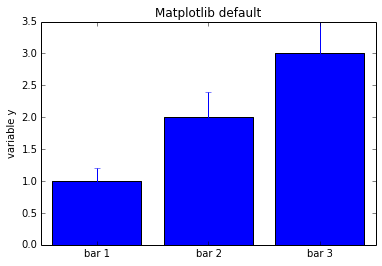

In [31]:
barplot_default()

<hr>

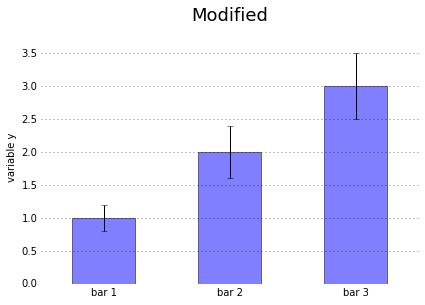

In [32]:
barplot_modified()

<br>
<br>

# Histograms

[[back to top](#Sections)]

In [33]:
import numpy as np
import random
from matplotlib import pyplot as plt

data1 = [random.gauss(15,10) for i in range(500)]  
data2 = [random.gauss(5,5) for i in range(500)]  

### Default Histogram

In [34]:
def histogram_default():

    fig = plt.figure(figsize=(8,6))
    
    bins = np.arange(-60, 60, 2.5)

    # plot histograms
    plt.hist(data1, bins=bins, label='class 1')
    plt.hist(data2, bins=bins, label='class 2')
    
    # labels
    plt.title('Matplotlib default')
    plt.xlabel('variable X')
    plt.ylabel('count')
    plt.legend(loc='upper right')

    plt.show()

### Modified Histogram

In [40]:
def histogram_modified():

    bins = np.arange(-60, 60, 2.5)
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 
    
    # plot histograms
    plt.hist(data1, bins=bins, 
             alpha=0.3,        # transparency
             label='class 1')
    plt.hist(data2, bins=bins, 
             alpha=0.3,        # transparency
             label='class 2')
    
    # axis formatting
    plt.ylim([0, 110])
    plt.xlim([min(data1+data2)-5, max(data1+data2)+5])

    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)    
    
    # labels    
    plt.xlabel('variable X')
    plt.ylabel('count')
    plt.legend(loc='upper right', fancybox=True)

    # raised title
    plt.text(15, 120, 'Modified',
         horizontalalignment='center',
         fontsize=18)    
    
    plt.show()

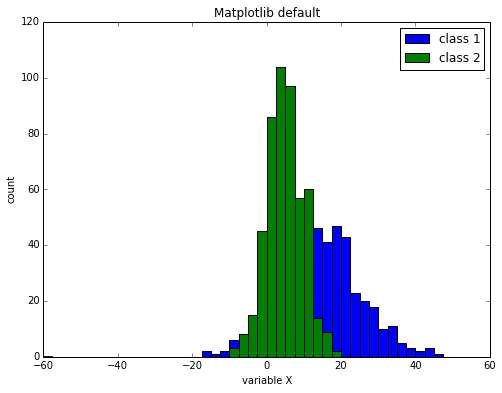

In [41]:
histogram_default()

<hr>

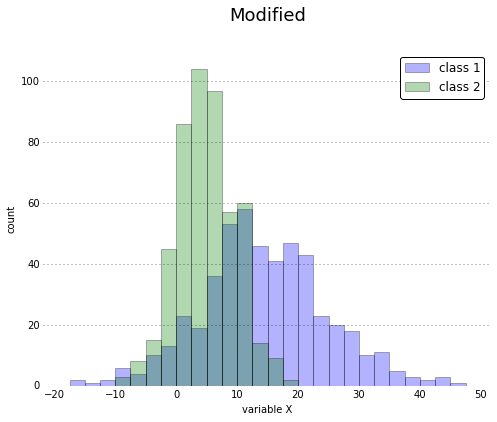

In [42]:
histogram_modified()

<br>
<br>

# Pie charts

[[back to top](#Sections)]

### Default pie chart

In [8]:
from matplotlib import pyplot as plt
import numpy as np

def piechart_default():

    plt.pie(
        (10,5),
        labels=('spam','ham'))
    plt.legend()
    plt.title('Matplotlib default')
    plt.show()

### Modified pie chart

In [9]:
def piechart_modified():

    plt.pie(
        (10,5),
        labels=('spam','ham'),
        shadow=True,
        colors=('lightskyblue', 'yellowgreen'),
        explode=(0,0.15), # space between slices 
        startangle=90,    # rotate conter-clockwise by 90 degrees
        autopct='%1.1f%%',# display fraction as percentage
        )
    plt.legend(fancybox=True)
    plt.axis('equal')     # plot pyplot as circle
    plt.tight_layout()
    plt.title('Modified')
    plt.show()

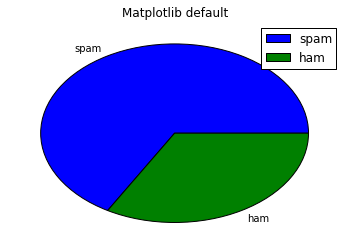

In [10]:
piechart_default()

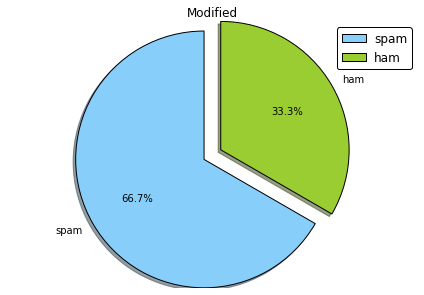

In [11]:
piechart_modified()

<br>
<br>

# Violin plots

[[back to top](#Sections)]

In [5]:
import numpy as np
data = [np.random.normal(0, std, 50) for std in range(1, 4)]

### Default violin plot

In [10]:
import matplotlib.pyplot as plt

def violin_default():

    fig = plt.figure(figsize=(8,6))

    plt.violinplot(data)

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])
    plt.title('Matplotlib default')
    plt.show()

### Modified violin plot

In [14]:
def violin_modified():
    
    fig = plt.figure(figsize=(8,6))
    ax = plt.subplot(111) 

    vplot = plt.violinplot(data,
               showmeans=False,
               showmedians=True,
               showextrema=False
               )

    # choosing custom colors to fill the boxes
    colors = ['red', 'blue', 'green']
    for patch, color in zip(vplot['bodies'], colors):
        patch.set_facecolor(color)


    # hiding axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # adding horizontal grid lines 
    ax.yaxis.grid(True) 
    
    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False) 
    ax.spines["bottom"].set_visible(False) 
    ax.spines["left"].set_visible(False)

    plt.xticks([y+1 for y in range(len(data))], ['x1', 'x2', 'x3'])

    # raised title
    plt.text(2, 9, 'Modified',
         horizontalalignment='center',
         fontsize=18)

    plt.tight_layout()
    plt.show()

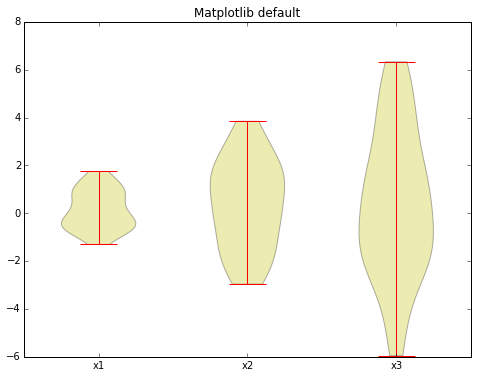

In [15]:
violin_default()

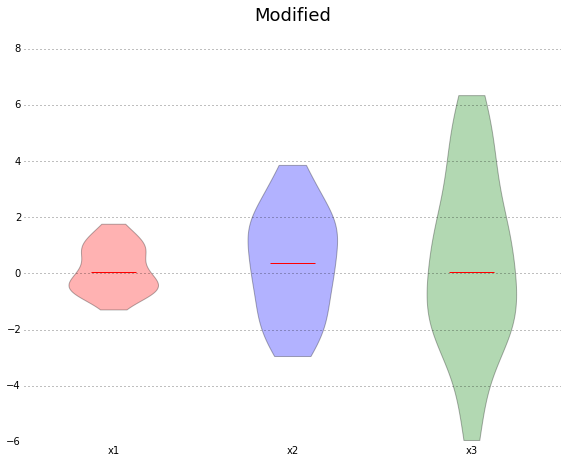

In [16]:
violin_modified()